<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml13_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Data

Fruits 360 dataset: https://www.kaggle.com/moltean/fruits

In [3]:
# jupyter notebook에서 shell 명령어(linux 명령어) 실행
!wget https://bit.ly/fruits_300 -O fruits_300.npy
# 웹주소(https://...)에 있는 파일을 다운로드해서 파일(fruits_300.npy)로 저장

--2021-03-22 02:12:00--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-22 02:12:00--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-22 02:12:00--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [4]:
# 파일을 읽어서 numpy 배열을 리턴
fruits = np.load('fruits_300.npy')

In [5]:
fruits.shape  #> (n_samples, height, width), 100x100 크기의 흑백 이미지 300개.

(300, 100, 100)

## 데이터 시각화

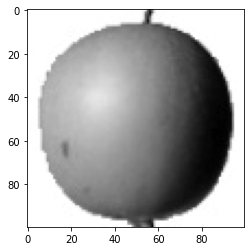

In [9]:
# 첫번째 이미지 시각화
plt.imshow(fruits[0], cmap=plt.cm.binary)
plt.show()

In [21]:
np.ceil(10), np.ceil(10.1)

(10.0, 11.0)

In [37]:
def plot_fruit(images):
    """한줄에 최대10개의 이미지를 출력. 줄의 개수는 이미지의 개수에 따라서 결정.
    """
    n = len(images)  # 이미지 개수
    cols = 10  # 한줄에 출력할 이미지 개수
    rows = int(np.ceil(n / cols))  # 이미지를 출력할 줄(행)의 개수 <- 배열의 인덱스는 정수여야 하기 때문에
    print(rows)
    # 이미지를 출력할 행/열의 개수만큼 subplot을 생성
    # figsize=(width, height)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols, rows))
    for i in range(rows):  # 행의 개수만큼 반복
        for j in range(cols):  # 열의 개수만큼 반복
            img_idx = i * 10 + j
            if rows == 1:
                if img_idx < n:  # 이미지가 있는 인덱스에 대해서만 이미지 출력.
                    axes[img_idx].imshow(images[img_idx], cmap=plt.cm.binary)
                axes[img_idx].axis('off')
            else:
                if img_idx < n:  # 이미지가 있는 인덱스에 대해서만 이미지 출력.
                    axes[i, j].imshow(images[img_idx], cmap=plt.cm.binary)
                axes[i, j].axis('off')

1


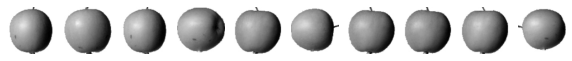

In [38]:
plot_fruit(fruits[0:10])
plt.show()